In [30]:
# coding=utf-8
from __future__ import unicode_literals

"""
Convert `Image` to `Text Line Images` and then convert them to `Text` file.  

to run
    `PYTHONIOENCODING=utf-8 python3`

"""
import os
import numpy as np
import matplotlib.pyplot as plt

import cv2
import config
from pytesseract import image_to_string


# Tesseract - Unicode errors
# encoding=utf8


def show_img(data):
    plt.figure(figsize=(10, 10))
    plt.imshow(data, 'gray')


def get_threshold_image(image):
    image = (image * 1.0) / image.max()
    THRESHOLD_LIMIT = 0.40
    image[image <= THRESHOLD_LIMIT] = 0.0
    image[image > THRESHOLD_LIMIT] = 1.0
    return image


def get_threshold_image2(image):
    image = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                  cv2.THRESH_BINARY, 11, 2)
    image = (image * 1.0) / image.max()
    THRESHOLD_LIMIT = 0.40
    image[image <= THRESHOLD_LIMIT] = 0.0
    image[image > THRESHOLD_LIMIT] = 1.0
    return image


def get_line_segments(image):
    # threshold
    image = get_threshold_image(image)
    plt_data = image.min(axis=1)
    # plt.figure(figsize=(15, 2))
    # plt.plot(range(len(plt_data)), plt_data, '*')

    plt_data_index = np.arange(len(plt_data))
    data = plt_data_index[plt_data == 0]
    i = 0
    start = i
    memory = data[i]

    line_segments = []

    while i < len(data) - 1:
        i += 1
        if data[i] == memory + 1:
            memory += 1
        else:
            line_segments.append(
                (data[start], data[i])
            )
            # print(data[start], data[i])
            start = i
            memory = data[i]
    # Fix
    line_segments.append((data[start], data[i]))

    return line_segments




["Vic.\n\n \n\nAnthony's Steakhouse:",
 "Vic.\n\n \n\nAnthony's Steakhouse:",
 '‘129 £, Fremont Str',
 '‘129 £, Fremont Str',
 '(702) 386-8399',
 '(702) 386-8399',
 'Server: Luciano 04/24/2014\nTable 73/1 5:59 PH\nGuests: 3 0001',
 'Server: Luciano 04/24/2014\nTable 73/1 5:59 PH\nGuests: 3 0001',
 'Reprint #: 1',
 'Reprint #: 1',
 '‘Area: Restaurant',
 '‘Area: Restaurant',
 '‘Au Gratin Potatoes\n\n9.00',
 '‘Au Gratin Potatoes\n\n9.00',
 'Brussels Sprouts.',
 'Brussels Sprouts.',
 'Diet Coke (2 83.00)',
 'Diet Coke (2 83.00)',
 'Spinach Salad 10.00,',
 'Spinach Salad 10.00,',
 'Bone-In Ribeye (2 868.00) 136,00',
 'Bone-In Ribeye (2 868.00) 136,00',
 'Amaretto Express: 16.00,',
 'Amaretto Express: 16.00,',
 'Chopped Steakhouse Saled 6.00',
 'Chopped Steakhouse Saled 6.00',
 '‘Subtotal',
 '‘Subtotal',
 'Tax 15.80',
 'Tax 15.80',
 'Total 210.80',
 'Total 210.80']

["Vic.\n\n \n\nAnthony's Steakhouse:",
 "Vic.\n\n \n\nAnthony's Steakhouse:",
 '‘129 £, Fremont Str',
 '‘129 £, Fremont Str',
 '(702) 386-8399',
 '(702) 386-8399',
 'Server: Luciano              04/24/2014\nTable 73/1                        5:59 PH\nGuests: 3                                0001',
 'Server: Luciano              04/24/2014\nTable 73/1                        5:59 PH\nGuests: 3                                0001',
 'Reprint #: 1',
 'Reprint #: 1',
 '‘Area: Restaurant',
 '‘Area: Restaurant',
 '‘Au Gratin Potatoes\n\n9.00',
 '‘Au Gratin Potatoes\n\n9.00',
 'Brussels Sprouts.',
 'Brussels Sprouts.',
 'Diet Coke (2 83.00)',
 'Diet Coke (2 83.00)',
 'Spinach Salad                    10.00,',
 'Spinach Salad                    10.00,',
 'Bone-In Ribeye (2 868.00)         136,00',
 'Bone-In Ribeye (2 868.00)         136,00',
 'Amaretto Express:                  16.00,',
 'Amaretto Express:                  16.00,',
 'Chopped Steakhouse Saled           6.00',
 'Chopped Steakhouse

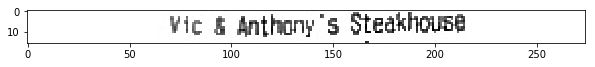

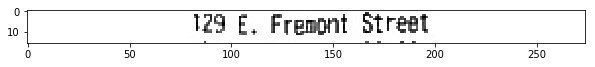

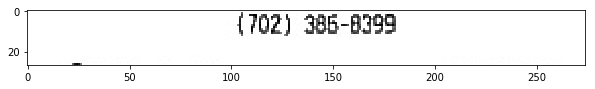

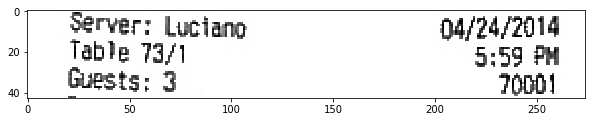

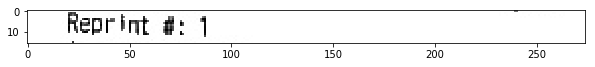

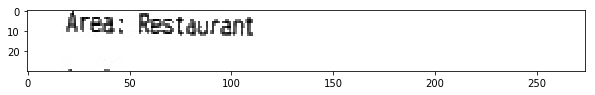

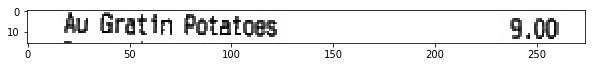

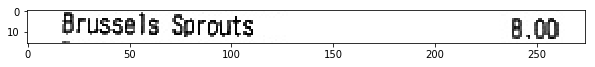

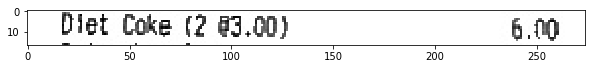

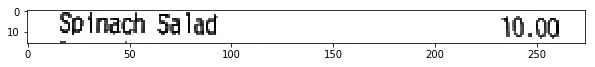

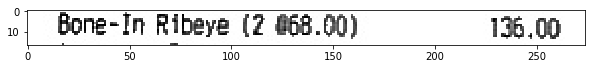

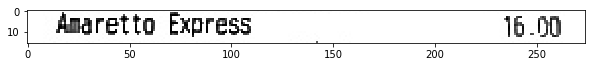

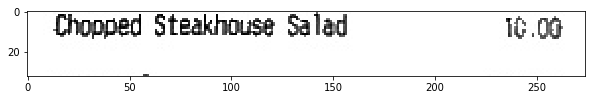

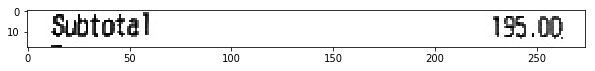

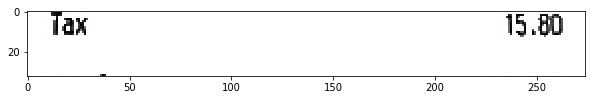

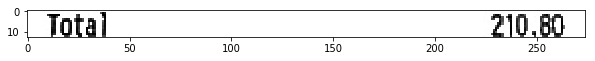

In [37]:
my_config = '-c tessedit_char_whitelist=0123456789abcdefghijklmnopqrstuvwxyz -c preserve_interword_spaces=1'


def image_to_text_lines(image):
    line_segments = get_line_segments(image)
    collected_text_data = []
    for start, end in line_segments:
        if abs(start - end) < 10:
            continue
        text_data = image_to_string(image[start - 2: end + 2, :])
        text = image_to_string(image[start - 2: end + 2, :],
                                           config='-c preserve_interword_spaces=1', lang='defeng')
        text2 = image_to_string(image[start - 2: end + 2, :],
                                           config=my_config, lang='defeng')
        if text_data:
            show_img(image[start - 1: end + 1, :])
            # print(text_data)
#             collected_text_data.append(text_data)
            collected_text_data.append(text)
#             collected_text_data.append(text1)
            collected_text_data.append(text2)
    return collected_text_data


image_to_text_lines(plt.imread('static/data/binarisation/348s (91).jpg'))

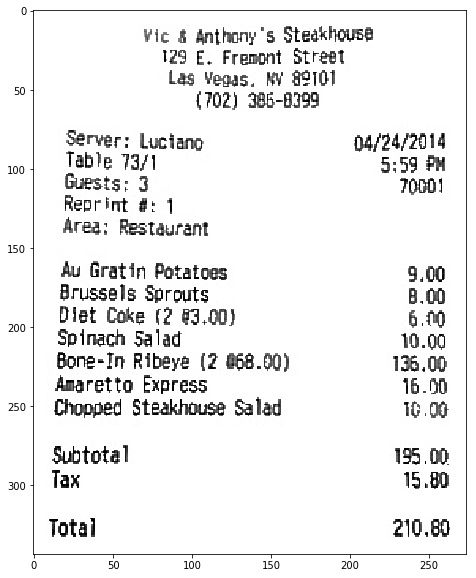

In [33]:
plt.figure(figsize=(10, 10))
plt.imshow(plt.imread('static/data/binarisation/348s (91).jpg'), 'gray')

In [2]:
!ls -l static/data/binarisation/ | head

total 5824
-rw-r--r--  1 sampathm  staff  22875 Mar 12 12:41 348s (104).jpg
-rw-r--r--  1 sampathm  staff  36550 Mar 12 12:41 348s (108).jpg
-rw-r--r--  1 sampathm  staff  31823 Mar 12 12:41 348s (114).jpg
-rw-r--r--  1 sampathm  staff  23422 Mar 12 12:42 348s (116).jpg
-rw-r--r--  1 sampathm  staff  29835 Mar 12 12:42 348s (117).jpg
-rw-r--r--  1 sampathm  staff  24198 Mar 12 12:41 348s (118).jpg
-rw-r--r--  1 sampathm  staff  24917 Mar 12 12:41 348s (119).jpg
-rw-r--r--  1 sampathm  staff  31441 Mar 12 12:42 348s (121).jpg
-rw-r--r--  1 sampathm  staff  26779 Mar 12 12:41 348s (122).jpg


In [7]:
from glob import glob

In [ ]:
!cp -p 'static/data/binarisation/348s (124).jpg' static/data/binarisation/sample.jpg

In [ ]:
!convert -auto-level -sharpen 0x4.0 -contrast static/data/binarisation/sample.jpg static/data/binarisation/sample1.jpg

In [4]:
image_to_text_lines(plt.imread('static/data/binarisation/sample.jpg'))

['if Je/TaoM 6\nREcaLL fasLe #256\nPRS 16 OED sh',
 '®0',
 'EDWIN 443+2269',
 'TAXI MT',
 'TOTAL 8\nSTORE MLE',
 '* DRDER# 0182 *',
 '158 KOFD 10 GROSS']

In [5]:
image_to_text_lines(plt.imread('static/data/binarisation/sample1.jpg'))

['TL SBM ne\n\nor a\nRecaLl fame 8250\nARS IE DER sh',
 '®\n2',
 'ar ,\nPos ot nes)\n[tte\n\n2\ni',
 'EDWIN 443+2289',
 'TAXI MT',
 'TOTAL $18\nSFE INE']

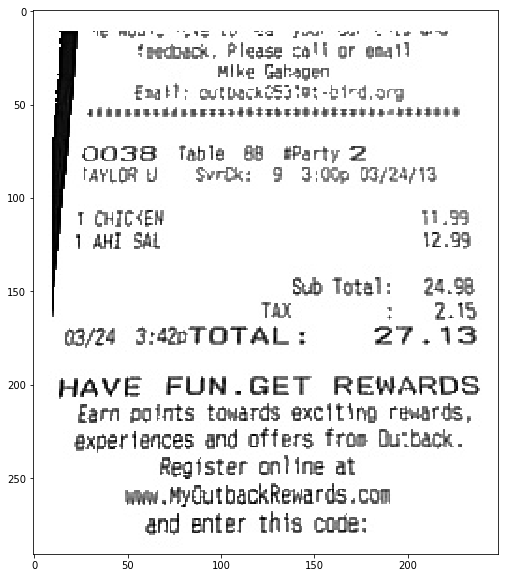

In [8]:
plt.figure(figsize=(10, 10))

plt.imshow(plt.imread('static/data/binarisation/348s (43).jpg'), 'gray')

In [ ]:
plt.figure(figsize=(10, 10))

plt.imshow(plt.imread('static/data/binarisation/sample1.jpg'), 'gray')

In [ ]:
!tesseract --version

In [6]:
image = plt.imread('static/data/binarisation/348s (116).jpg')

image.shape

(320, 238)

In [12]:
image_to_text_lines(plt.imread('static/data/binarisation/348s (43).jpg'))

['" iriack, Pleste ol or eeail\nke Bahagen\n211 oUeCES: birg.org\n\n \n\n \n\n0038 Taple 8 werty 2\nWRY Sk 9 306 037213\n\nT oHCEn\n1 AT AL',
 '" iriack, Pleste ol or eeail\nke Bahagen\n211 oUeCES: birg.org\n\n \n\n \n\n0038 Taple 8 werty 2\nWRY Sk 9 306 037213\n\nT oHCEn\n1 AT AL',
 '27.13',
 '27.13',
 'HAVE FUN.GET REWARDS',
 'HAVE FUN.GET REWARDS',
 'Earn points towards exciting rewards,',
 'Earn points towards exciting rewards,',
 '‘experiences and offers fros Dutback.',
 '‘experiences and offers fros Dutback.',
 'Register online at',
 'Register online at',
 '‘ww MyTutbackRewards .com',
 '‘ww MyTutbackRewards .com']

In [ ]:
!tesseract --list-langs

# Apply OCR on above Images

# Identify Image size and segregate

In [ ]:
def removeExtraLinesFromString(inputstring):
    stringtoreturn = ""
    for line in inputstring.split("\n"):
        if len(line.strip()) > 0: #Only add non empty lines to the stringtoreturn
            stringtoreturn = stringtoreturn + line
    return stringtoreturn


def runCmd(cmd): #string of a command passed in here
    from subprocess import run, PIPE
    stringtoreturn = str( run(cmd, shell=True, stdout=PIPE).stdout.decode('utf-8') )
    stringtoreturn = removeExtraLinesFromString(stringtoreturn)
    return stringtoreturn


def runParallelCmds(listofcommands): 
    from multiprocessing.dummy import Pool #thread pool
    from subprocess import Popen, PIPE, STDOUT
    listofprocesses = [Popen(listofcommands[i], shell=True,stdin=PIPE, stdout=PIPE, stderr=STDOUT, close_fds=True) for i in range(len(listofcommands))] 
    #Python calls this list comprehension, it's a way of making a list
    def get_outputs(process): #MultiProcess Thread Pooling require you to map to a function, thus defining a function.
        return process.communicate()[0] #process is object of type subprocess.Popen
    outputs = Pool(len(listofcommands)).map(get_outputs, listofprocesses) #outputs is a list of bytes (which is a type of string)
    listofoutputstrings = []
    for i in range( len(listofcommands) ):
        outputasstring = removeExtraLinesFromString(  outputs[i].decode('utf-8')  ) #.decode('utf-8') converts bytes to string
        listofoutputstrings.append( outputasstring )
    return listofoutputstrings

In [ ]:
listofcommands = [
    'sleep 1;echo 1',
    'sleep 2;echo 2',
    'sleep 1.5;echo 1.5', 
]

In [ ]:
tot_time = 0
listofcommands = []

for i in range(1, 100):
    cmd = 'sleep {}; echo {}'.format(i * 0.01, i)
    tot_time += i * 0.01
    # print(cmd)
    listofcommands.append(cmd)

print(tot_time)

In [ ]:
%%time

outputs = runParallelCmds(listofcommands)

In [ ]:
%%time

!sleep 4.1

In [22]:
# OCROPUS

In [27]:
!pip install ocropy

  Could not find a version that satisfies the requirement ocropy (from versions: )
No matching distribution found for ocropy


In [23]:
from pylab import *
import ocrolib
from ocrolib import morph
def display(f): imshow(imread(f),cmap=cm.gray)
def displaysegs(f): morph.showlabels(ocrolib.read_line_segmentation(f))

ModuleNotFoundError: No module named 'ocrolib'